In [119]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('college_food.csv')

In [66]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [125]:
pd.set_option('display.max_rows', 10)
df['weight']


0      187.0
1      155.0
2        NaN
3        NaN
4      190.0
       ...  
120    156.0
121    180.0
122    120.0
123    135.0
124    135.0
Name: weight, Length: 125, dtype: float64

In [5]:
weight = repr(df['weight'])
my_string=re.findall(r'\d{3}+[\n]',weight)
cleaned_data = [entry.strip('\n') for entry in my_string]

In [60]:
add = []
for i in cleaned_data:
    temp = i[:]
    temp = int(temp)
    add.append(temp)

add.insert(2, np.nan)
add.insert(30,np.nan)
add.insert(72,np.nan)
add.insert(66,144)
df['weight'] = add

In [53]:
gpa = repr(df['GPA'])
test=re.findall(r'\d+[.]+\d{0,3}+[\n]|\d{1}+[\n]',gpa)

In [115]:
def cleaning_col(column,type,data):
    my_array = []
    for i in data[column]:
        try:
            temp = type(i)
            my_array.append(temp)
        except ValueError:
            temp = np.nan
            my_array.append(temp)
    data[column] = my_array

In [116]:
cleaning_col('GPA',float,df)
cleaning_col('weight',int,df)

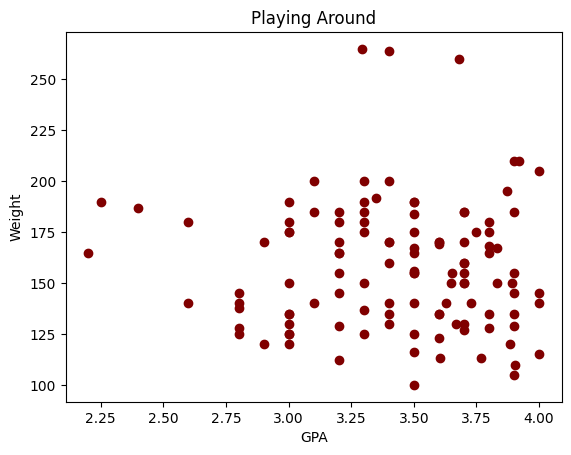

In [124]:
plt.scatter(df['GPA'], df['weight'], color='maroon', marker='o', label='Scatter Plot')
plt.xlabel('GPA')
plt.ylabel('Weight')
plt.title('Playing Around')
plt.show()

In [126]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,NaN
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156.0
121,3.000,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180.0
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120.0
123,3.000,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135.0
